In [1]:
import mne
%matplotlib qt5
import numpy as np
from my_ecog_utils import read_with_annotations

Opening raw data file data/112/stimulated_ieeg.fif...
Isotrak not found
    Range : 0 ... 48311 =      0.000 ...   193.244 secs
Ready.
Using matplotlib as 2D backend.


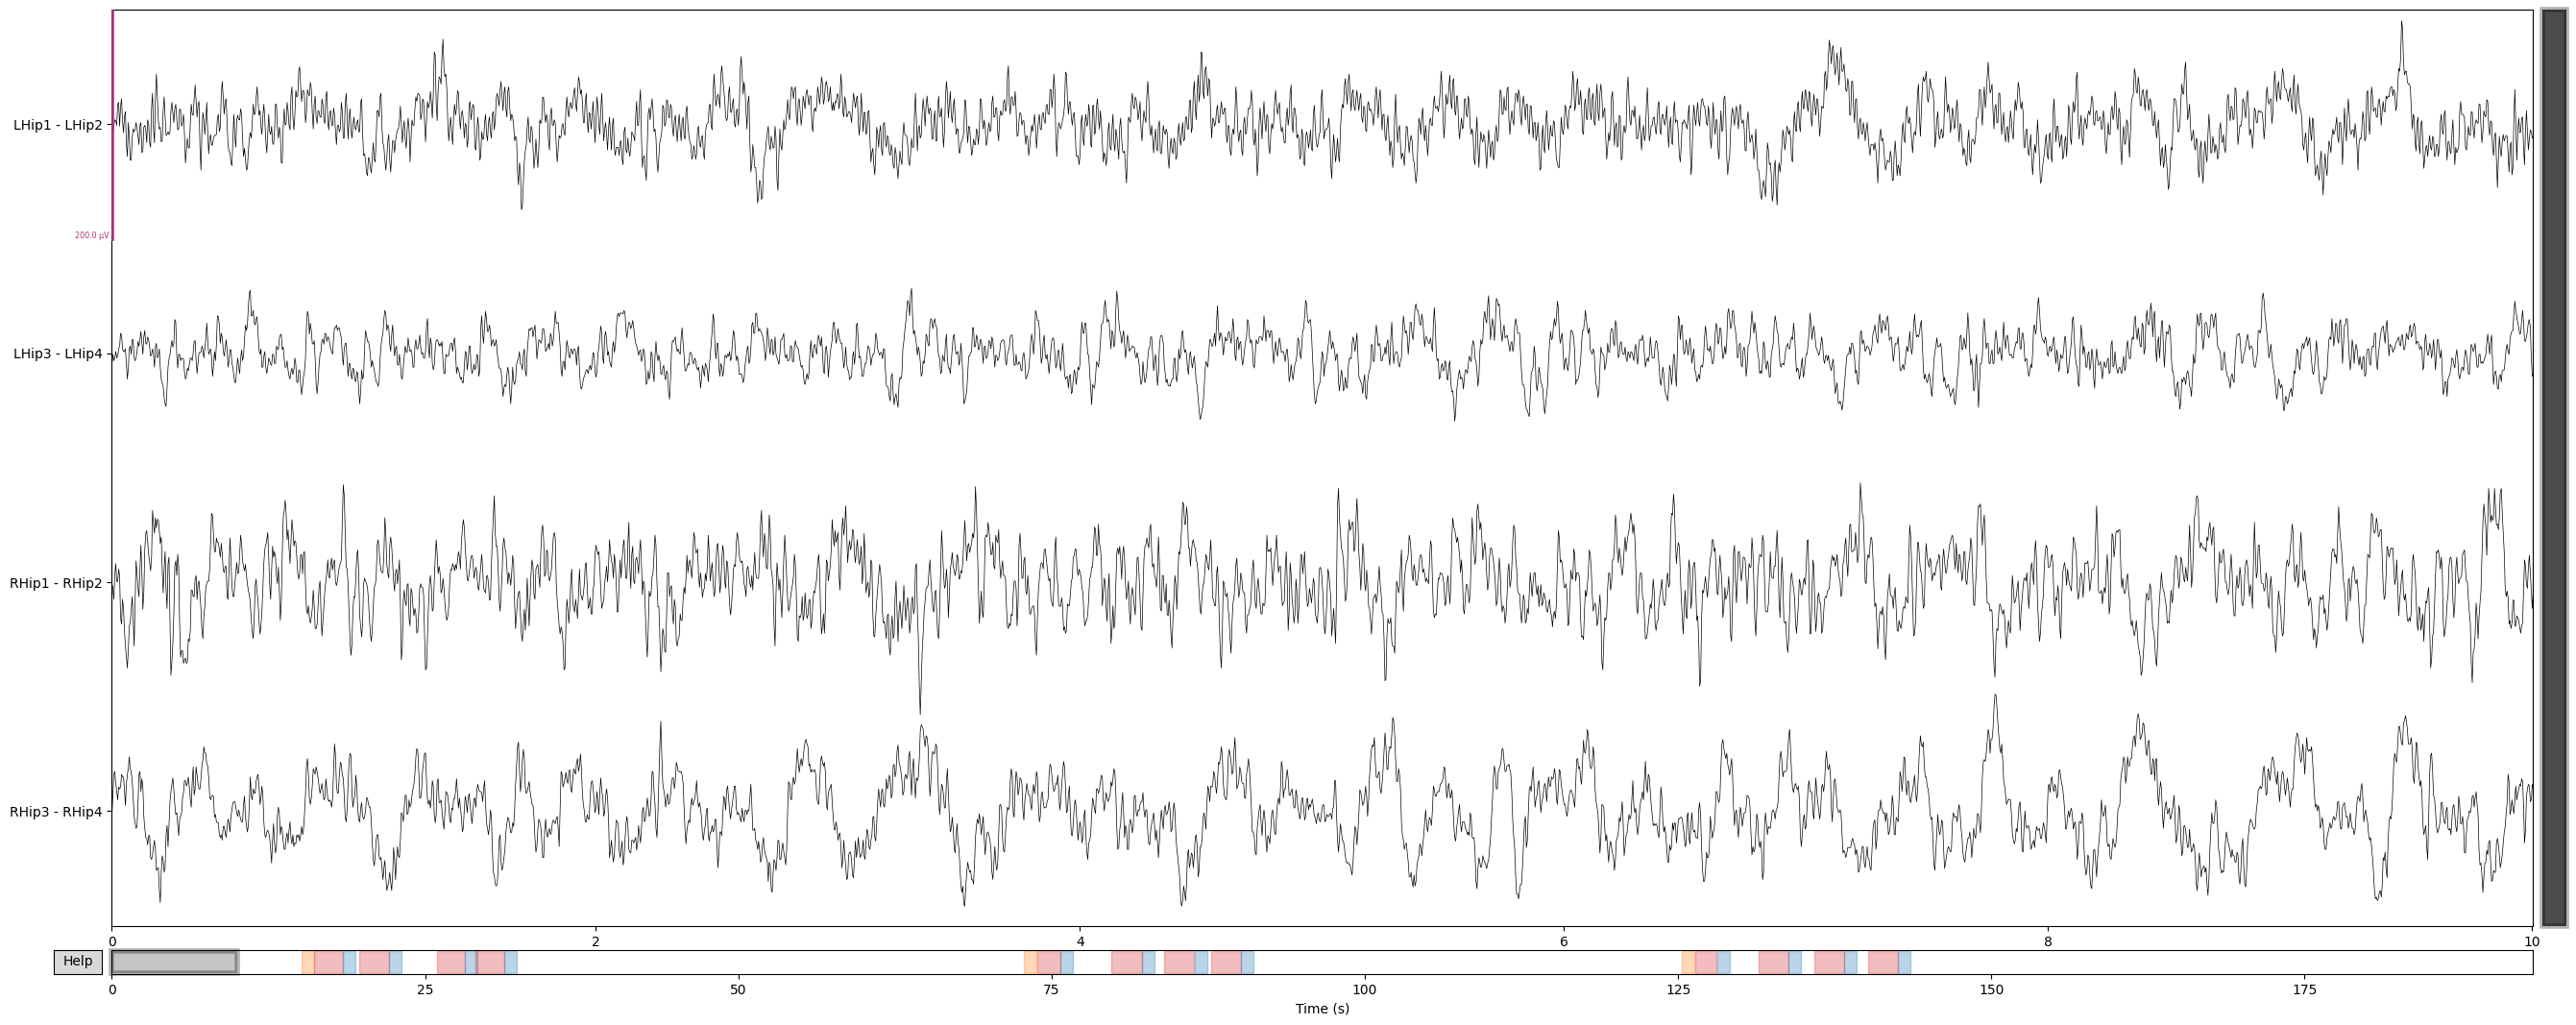

Channels marked as bad: none


In [2]:
pt_num = 112
raw = read_with_annotations(pt_num, stim='stimulated', annotations='auto')
raw.plot()

In [9]:
raw.annotations.onset[19], raw.annotations.onset[20]

(133.394, 133.394)

In [13]:
raw.annotations.description[19]

'pre_shock'

In [11]:
raw.annotations.delete(19)

In [12]:
raw.annotations.save('data/103/every_pre.csv', overwrite=True)

Overwriting existing file.


In [38]:
for epoch in range(len(epochs)):
    print(epochs[epoch].event_id)

{'pre_shock': 1}
{'post_shock': 2}
{'post_shock': 2}
{'post_shock': 2}
{'post_shock': 2}
{'pre_shock': 1}
{'post_shock': 2}
{'post_shock': 2}
{'post_shock': 2}
{'post_shock': 2}
{'pre_shock': 1}
{'post_shock': 2}
{'post_shock': 2}
{'post_shock': 2}
{'post_shock': 2}
Channels marked as bad: none


In [36]:
evts, event_id = mne.events_from_annotations(raw, {'BAD_': 0, 'post_shock': 2, 'pre_shock': 1})
epochs = mne.Epochs(raw, evts, event_id=event_id, tmin=0, tmax=1.0, baseline=(0.5,1.0))

Used Annotations descriptions: ['post_shock', 'pre_shock']
Not setting metadata
Not setting metadata
15 matching events found
Applying baseline correction (mode: mean)
0 projection items activated


In [9]:
x = pd.DataFrame(raw.get_data().transpose(), columns=raw.info['ch_names'])

ch_flat = []
for chan in raw.info['ch_names']:
    ch_flat.append((x[chan].diff() == 0) & (x[chan] == x[chan].shift().shift()) & (x[chan] == x[chan].shift().shift().shift()))
x['is_artifact'] = ch_flat[0] & ch_flat[1] & ch_flat[2] & ch_flat[3]

In [10]:
x[x['is_artifact']==True]

RHip1 - RHip2  RHip3 - RHip4  RST1 - RST2  RST3 - RST4  is_artifact
16779       -0.00041       -0.00041     -0.00041     -0.00041         True
16780       -0.00041       -0.00041     -0.00041     -0.00041         True
16781       -0.00041       -0.00041     -0.00041     -0.00041         True
16782       -0.00041       -0.00041     -0.00041     -0.00041         True
16783       -0.00041       -0.00041     -0.00041     -0.00041         True
...              ...            ...          ...          ...          ...
56515       -0.00041       -0.00041     -0.00041     -0.00041         True
56516       -0.00041       -0.00041     -0.00041     -0.00041         True
56517       -0.00041       -0.00041     -0.00041     -0.00041         True
56518       -0.00041       -0.00041     -0.00041     -0.00041         True
56519       -0.00041       -0.00041     -0.00041     -0.00041         True

[6198 rows x 5 columns]

In [5]:
import pandas as pd

In [26]:
raw.annotations.save(f'data/{pt_num}/stimulated_shocks_bad.csv', overwrite=True)

Overwriting existing file.


# Random Stuff

In [5]:
raw1 = mne.io.read_raw('data/108/stimulated1_ieeg.fif')
raw2 = mne.io.read_raw('data/108/stimulated2_ieeg.fif')

Opening raw data file data/108/stimulated1_ieeg.fif...
Isotrak not found
    Range : 0 ... 59879 =      0.000 ...   239.516 secs
Ready.
Opening raw data file data/108/stimulated2_ieeg.fif...
Isotrak not found
    Range : 0 ... 30431 =      0.000 ...   121.724 secs
Ready.


In [30]:
evts, event_id = mne.events_from_annotations(raw, {'BAD_': 0, 'post_shock': 2, 'pre_shock': 1})
epochs = mne.Epochs(raw, evts, event_id=event_id, tmin=0, tmax=1, baseline=(0.5,1.0))

Used Annotations descriptions: ['post_shock', 'pre_shock']
Not setting metadata
Not setting metadata
13 matching events found
Applying baseline correction (mode: mean)
0 projection items activated


Loading data for 1 events and 251 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Need more than one channel to make topography for ecog. Disabling interactivity.


C:\Users\seand\AppData\Local\Temp/ipykernel_18736/1895261204.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  epochs[0].plot_psd(picks='RHip3 - RHip4')


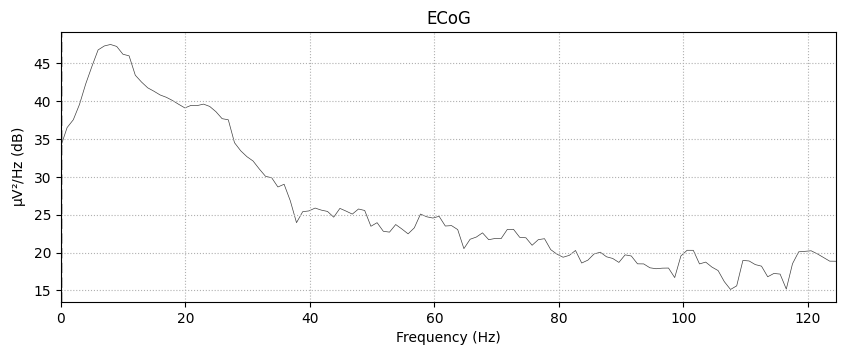

Channels marked as bad: none


In [28]:
epochs[0].plot_psd(picks='RHip3 - RHip4')

In [19]:
delta = mne.time_frequency.psd_welch(raw, fmin=1, fmax=3)[0].mean()
theta = mne.time_frequency.psd_welch(raw, fmin=4, fmax=7)[0].mean()
alpha = mne.time_frequency.psd_welch(raw, fmin=8, fmax=12)[0].mean()
beta = mne.time_frequency.psd_welch(raw, fmin=13, fmax=30)[0].mean()
gamma = mne.time_frequency.psd_welch(raw, fmin=31, fmax=100)[0].mean()
delta, theta, alpha, beta, gamma

Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)


(1.1960434085328856e-10,
 3.873208851192042e-11,
 2.4699118414384607e-11,
 1.1381227592236538e-11,
 9.5087683757072e-13)

In [12]:
evts, evt_dict = mne.events_from_annotations(raw)
evt_dict

{}

In [13]:
epochs = mne.Epochs(raw, evts, event_id=evt_dict, tmin=1, tmax=3, baseline=(1.5, 2.0))
epochs.plot_psd()

ValueError: zero-size array to reduction operation maximum which has no identity

In [ ]:
epochs.load_data()
csd = mne.time_frequency.csd_fourier(epochs, 1, 100)

Loading data for 12 events and 501 original time points ...
Computing cross-spectral density from epochs...


100%|██████████| CSD epoch blocks : 12/12 [00:00<00:00,   51.11it/s]

[done]


In [ ]:
mat = csd.sum(13, 30).get_data()
mat

array([[ 1.90501161e-09+0.00000000e+00j, -2.66206808e-10+1.76027564e-10j,
        -2.29233007e-11-2.25916959e-12j, -6.75822080e-11-1.39787454e-12j],
       [-2.66206808e-10-1.76027564e-10j,  6.62410336e-10+0.00000000e+00j,
         3.34987243e-11+1.33673140e-12j,  5.06154380e-11+2.43488118e-11j],
       [-2.29233007e-11+2.25916959e-12j,  3.34987243e-11-1.33673140e-12j,
         4.66611818e-11+0.00000000e+00j, -1.11351595e-11+1.73697393e-13j],
       [-6.75822080e-11+1.39787454e-12j,  5.06154380e-11-2.43488118e-11j,
        -1.11351595e-11-1.73697393e-13j,  2.47697398e-10+0.00000000e+00j]])

In [ ]:
def coherence(csd, i, j):
    return np.absolute(np.absolute(csd[i][j]) ** 2 / (csd[i][i] * csd[j][j]))

In [ ]:
coherence_matrix = [[coherence(mat, i, j) for j in range(4)] for i in range(4)]
coherence_matrix

[[1.0, 0.08071306585020212, 0.005968961707807899, 0.009683479694594613],
 [0.08071306585020212, 1.0, 0.03636341740078686, 0.019227442660152243],
 [0.005968961707807899, 0.03636341740078686, 1.0, 0.010730534784195604],
 [0.009683479694594613, 0.019227442660152243, 0.010730534784195604, 1.0]]

In [ ]:
cov = mne.compute_covariance(epochs)
cov

Computing rank from data with rank=None
    Using tolerance 7.1e-12 (2.2e-16 eps * 4 dim * 8e+03  max singular value)
    Estimated rank (ecog): 4
    ECOG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 6012
[done]


<Covariance | size : 4 x 4, n_samples : 6011, data : [[ 6.45080739e-09 -1.87639827e-12  2.16096432e-09  1.52342457e-09]
 [-1.87639827e-12  7.06041863e-09  1.83145948e-09  3.58870357e-09]
 [ 2.16096432e-09  1.83145948e-09  2.47423473e-09  1.91300953e-09]
 [ 1.52342457e-09  3.58870357e-09  1.91300953e-09  3.55689790e-09]]>

In [ ]:
cov.plot(raw.info)

Computing rank from covariance with rank=None
    Using tolerance 9.5e-16 (2.2e-16 eps * 4 dim * 1.1  max singular value)
    Estimated rank (ecog): 4
    ECOG: rank 4 computed from 4 data channels with 0 projectors


(<Figure size 380x370 with 2 Axes>, <Figure size 380x370 with 1 Axes>)